<a href="https://colab.research.google.com/github/IIbitoye/FDSfE_IIbitoye/blob/main/HW5/Copy_of_Ite's_HW5_on_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

---

###Data

The data used in this assignment contains a cleaned and curated version of the market real estate valuations collected from Sindian Dist., New Taipei City, Taiwan, by Prof. I-Cheng Yeh, Department of Civil Engineering, Tamkang University, Taiwan.

The features in the data are the following:

* ```transaction_date```: the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* ```house_age```: the house age (unit: year)
* ```distance_nearest_MRT_station```: the distance to the nearest MRT station (unit: meter)
* ```convenience_stores```: the number of convenience stores in the living circle on foot (integer)

The target is:
* ```house_price_unit_area```house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

---

## HW instructions:

Similar to what was done in class, your task is to do the following:
1.   create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

2.   create a multiple regression model that utilizes all features in the dataset to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

--

In [ ]:
# -- import libraries here
import pandas as pd
import numpy as np

Read the data file from the class repo which can be found in the folder "data" and is called "Real_estate.csv"

In [ ]:
# -- your code here 
RealEstate= pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/Real_estate.csv")

In [ ]:
RealEstate.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


## Task 1: simple linear regression

create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

---


Calculate the log10 of the ```distance_nearest_MRT_station``` column and add it as a new column to the data frame

In [ ]:
# -- your code here 
RealEstate["log_distance_nearest_MRT"]=np.log10(RealEstate["distance_nearest_MRT_station"])

In [ ]:
RealEstate.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area,log_distance_nearest_MRT
0,2012.917,32.0,84.87882,10,37.9,1.928799
1,2012.917,19.5,306.59470,9,42.2,2.486565
2,2013.583,13.3,561.98450,5,47.3,2.749724
3,2013.500,13.3,561.98450,5,54.8,2.749724
4,2012.833,5.0,390.56840,5,43.1,2.591697


Standardize your feature and target data (setting their mean to 0 and standard deviation to 1)

In [ ]:
features=RealEstate["log_distance_nearest_MRT"]
target=RealEstate["house_price_unit_area"]

In [ ]:
#standardization
#array_s=(array-mean)/standard_deviation

In [ ]:
# -- your code here
features_s=(features-features.mean())/features.std()
target_s=(target-target.mean())/target.std()

Using the code library of your choice, fit a linear regression model to the data

In [ ]:
import statsmodels.api as sm

In [ ]:
X=sm.add_constant(features_s)
y = target_s

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# -- your code here
simplemodel = sm.OLS(endog=y,exog=X).fit()
print(simplemodel.summary())

                              OLS Regression Results                             
Dep. Variable:     house_price_unit_area   R-squared:                       0.539
Model:                               OLS   Adj. R-squared:                  0.538
Method:                    Least Squares   F-statistic:                     482.2
Date:                   Tue, 25 Oct 2022   Prob (F-statistic):           2.52e-71
Time:                           20:45:42   Log-Likelihood:                -426.53
No. Observations:                    414   AIC:                             857.1
Df Residuals:                        412   BIC:                             865.1
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

Print both the $R^2$ and Adjusted-$R^2$ of this model 

(+1 bonus point for using the `.format()` method in `print` to show the two values and round them to 3 decimal places)

In [ ]:
# -- your code here
print ("r2= %.3f" % simplemodel.rsquared)
print ("adjusted-r2 = %.3f" %simplemodel.rsquared_adj)

r2= 0.539
adjusted-r2 = 0.538


Print the coefficient (slope) of the line

In [ ]:
# -- your code here
print ("coefficient = %.3f" %simplemodel.params['log_distance_nearest_MRT'])

coefficient = -0.734


From looking at the coefficient, what can you say about the relationship between the feature (the distance to the nearest MRT station) and the target (the house price/unit area)?

*Seeing as the coefficient is negative, we can say that there exists a negative relationship between the feature and the target. That is to say that as the distance to the nearest MRT (our feature) increases , then the house price/unit area(our target) increases.*

In [ ]:
ypred = simplemodel.predict(X)
print(ypred)

0      1.279187
1      0.436904
2      0.039505
3      0.039505
4      0.278143
         ...   
409   -1.260920
410    1.237450
411    0.277470
412    1.140856
413    1.237450
Length: 414, dtype: float64


In [ ]:
RealEstate["ypred"]=simplemodel.predict(X)
RealEstate.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area,log_distance_nearest_MRT,ypred
0,2012.917,32.0,84.87882,10,37.9,1.928799,1.279187
1,2012.917,19.5,306.59470,9,42.2,2.486565,0.436904
2,2013.583,13.3,561.98450,5,47.3,2.749724,0.039505
3,2013.500,13.3,561.98450,5,54.8,2.749724,0.039505
4,2012.833,5.0,390.56840,5,43.1,2.591697,0.278143


Plot the actual vs. model predicted values for the house price/unit area for all log10(distance to MRT station) values in the data

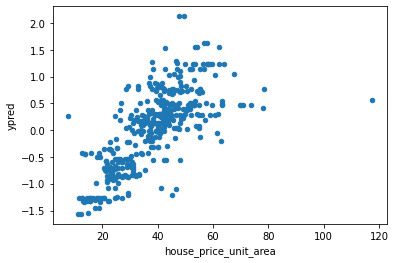

In [ ]:
RealEstate.plot("house_price_unit_area", "ypred", kind="scatter");

In [ ]:
RealEstate["house_price_unit_area_s"]=target_s

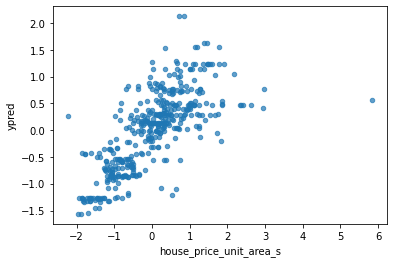

In [ ]:
# -- your code here
RealEstate.plot("house_price_unit_area_s", "ypred", kind="scatter", alpha=0.7);

This is a plot of the values of the model's predicted house price per unit area against the actual house prices per unit area. Although there is an obvious variance with the points(the points are far apart and are scattered), from the general direction of movement of the points (moving upward from left to right), we can tell that this graph has a positive slope.


## Task 2: multiple linear regression (all variables)

create a multiple regression model that utilizes all features to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

---

In [ ]:
features2=RealEstate[["log_distance_nearest_MRT","convenience_stores","transaction_date","house_age"]]
target2=RealEstate["house_price_unit_area"]

In [ ]:
#standardization
#array_s=(array-mean)/standard_deviation

Make sure all your features and target columns are standardized, and that you are using all the features in the data frame (also make sure to use ```log10(distance_nearest_MRT_station)``` rather than ```distance_nearest_MRT_station``` as a feature)

In [ ]:
# -- your code here
features2_s=(features2-features2.mean())/features2.std()
target2_s=(target2-target2.mean())/target2.std()

Using the code library of your choice, fit a multiple linear regression model to the data

In [ ]:
# -- your code here
X=sm.add_constant(features2_s)
y = target2_s
model2= sm.OLS(endog=y,exog=X).fit()
print(model2.summary())

                              OLS Regression Results                             
Dep. Variable:     house_price_unit_area   R-squared:                       0.601
Model:                               OLS   Adj. R-squared:                  0.597
Method:                    Least Squares   F-statistic:                     154.2
Date:                   Tue, 25 Oct 2022   Prob (F-statistic):           2.72e-80
Time:                           20:45:43   Log-Likelihood:                -396.62
No. Observations:                    414   AIC:                             803.2
Df Residuals:                        409   BIC:                             823.4
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Print the coefficients of each of the features

In [ ]:
# -- your code here
print ("coefficient for log_dist_MRT = %.3f" %model2.params['log_distance_nearest_MRT'])
print ("coefficient for convenience_stores= %.3f" %model2.params['convenience_stores'])
print ("coefficient for transaction_date= %.3f" %model2.params['transaction_date'])
print ("coefficient for house_age = %.3f" %model2.params['house_age'])

coefficient for log_dist_MRT = -0.643
coefficient for convenience_stores= 0.137
coefficient for transaction_date= 0.152
coefficient for house_age = -0.177


What can you claim about the relative correlation and influence of each feature on the prediction of the target variable?

*The magnitudes of the coefficients of each individual feature are not very large. The highest coeeficient is 0.152. This means that each feature has a minimal influence on the target variable, and that there is also little to no correlation between the features and the target.*

Print the $R^2$ of this model

In [ ]:
# -- your code here
print ("r2= %.3f" % model2.rsquared)

r2= 0.601


Looking only at the $R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

*Yes, the R-SQUARED for this model is better than that of the firstmodel, because it is higher.And the higher the R-SQUARED, the better the model fits your data.*

Print the Adjusted-$R^2$ of this model

In [ ]:
# -- your code here
print ("adjusted-r2 = %.3f" %model2.rsquared_adj)

adjusted-r2 = 0.597


Looking at both $R^2$ and Ajusted-$R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

*The adjusted Rsquared for this model is also higher than that of the first one. This is another indicaator that it is a better fit for our data.
   Because of this, I can say that the model has improved with the addition of the remaining features.*

In [ ]:
RealEstate["ypred2"]=model2.predict(X)
RealEstate.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area,log_distance_nearest_MRT,ypred,house_price_unit_area_s,ypred2
0,2012.917,32.0,84.87882,10,37.9,1.928799,1.279187,-0.005894,1.048997
1,2012.917,19.5,306.59470,9,42.2,2.486565,0.436904,0.310132,0.458673
2,2013.583,13.3,561.98450,5,47.3,2.749724,0.039505,0.684953,0.379497
3,2013.500,13.3,561.98450,5,54.8,2.749724,0.039505,1.236161,0.334718
4,2012.833,5.0,390.56840,5,43.1,2.591697,0.278143,0.376277,0.312620


Plot the actual vs. model predicted values for the house price/unit area for all objects in the data. Is there any visible improvement in the quality of the prediction that you can claim from comparing this plot with the one from Task 2? 

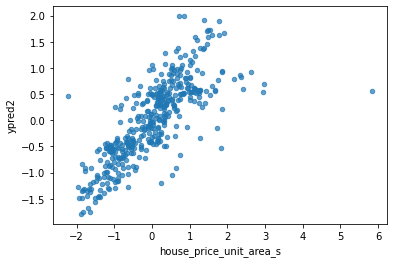

In [ ]:
# -- your code here
RealEstate.plot("house_price_unit_area_s", "ypred2", kind="scatter", alpha=0.7);

Yes, there is an improvement. The points on this plot are less scattered and form a more linear shape than our first plot did. The points are visibly fitted better in this second plot.